Pair Programming Asunciones Regresión Lineal - 3

In [53]:
!pip install researchpy

In [54]:
!pip install scipy

In [55]:
import numpy as np                                      # Tratamiento de datos
import pandas as pd
# ==============================================================================
import matplotlib.pyplot as plt                         # Gráficos
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
# ==============================================================================
from scipy import stats                                 # Asunciones y Preprocesamiento
import math
from scipy.stats import levene
import researchpy as rp
from sklearn.preprocessing import StandardScaler
import itertools
from scipy.stats import kstest
# ==============================================================================
import statsmodels.api as sm                            # ANOVA
from statsmodels.formula.api import ols
# ==============================================================================
from sklearn.linear_model import LinearRegression       #Linear Regresion con Sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
# ==============================================================================
import warnings                                         # Configuración warnings
warnings.filterwarnings('ignore')
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)                 # Tamaño gráficas

El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Cada asunción la deberéis testar de forma visual y analítica. Recordamos que estas asunciones son:
 -  Normalidad (ya la deberíais haber evaluado)
 -  Homogeneidad de varianzas
 -  Independencia de las variables
     

In [56]:
df = pd.read_csv('/mnt/d/Adalab/ejercicios-de-adalab/modulo-3/DA-promoC-Mod3-sprint1-MarinayMarta/files/wellness_1.csv', index_col = 0)
df.head(2)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,5,5,1,5,7,1,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,3,10,2,5,8,2,2,6,36 to 50,Female,655.6


In [57]:
df4 =df.copy()

In [58]:
# cambiamos el tipo de datos a 3 columnas:
for col in['DAILY_STRESS', 'BMI_RANGE', 'SUFFICIENT_INCOME']:
    df4[col] = df[col].astype('category') 

In [59]:
# eliminamos la columna Timestamp por no aportar al estudio, es solamente la fecha del los datos del mismo.
df4.drop(['Timestamp'], axis = 1, inplace = True)

In [60]:
df4['DAILY_STRESS'].replace(['1/1/00'], '3', inplace = True)

In [61]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15286 entries, 0 to 15285
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   FRUITS_VEGGIES           15286 non-null  int64   
 1   DAILY_STRESS             15286 non-null  category
 2   CORE_CIRCLE              15286 non-null  int64   
 3   SOCIAL_NETWORK           15286 non-null  int64   
 4   BMI_RANGE                15286 non-null  category
 5   DAILY_STEPS              15286 non-null  int64   
 6   SLEEP_HOURS              15286 non-null  int64   
 7   SUFFICIENT_INCOME        15286 non-null  category
 8   TIME_FOR_PASSION         15286 non-null  int64   
 9   WEEKLY_MEDITATION        15286 non-null  int64   
 10  AGE                      15286 non-null  object  
 11  GENDER                   15286 non-null  object  
 12  WORK_LIFE_BALANCE_SCORE  15286 non-null  float64 
dtypes: category(3), float64(1), int64(7), object(2)
memory usage:

## Asunción de Normalidad : 
- H0: nuestros datos son normales
- H1: nuestros datos no son normales. 
    - pvalor > 0.05 : aceptamos la hipótesis nula : datos normales con un intervalo de confianza del 95%. 
    - pvalor < 0.05 : rechazamos la hipótesis nula : datos no normales.






                    => pvalue < 0.05 => rechazamos hip.nula => datos no normales

- Analiticamente :  Test de Kolmogorov-Smirnov (nº observaciones > 50)
    - variable respuesta : 'LIFE_WORK_BALANCED_SCORE'

In [62]:
kstest(df4['WORK_LIFE_BALANCE_SCORE'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

- Graficamente

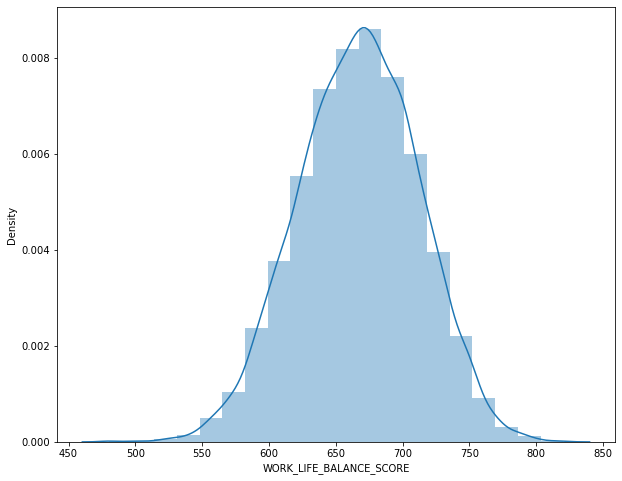

In [63]:

sns.distplot(df4['WORK_LIFE_BALANCE_SCORE'],  bins=20);

--> La grafica no presenta forma perfecta de la campana de Gauss, está cerca pero se nota alguna irregulariad en la distribución. También comprobado de forma analitica.

__________________________________________________________________________

# Homogeneidad de varianzas (homocedasticidad):
- Significa que las varianzas no varían entre los diferentes niveles de las variables.
- H0 : las varianzas son iguales : homogeneidad/homocedasticidad  <= pvalor > 0.05
- H1 : las varianzas son distintas : heterogeneidad/heterocedasticidad <= pvalor < 0.05

In [64]:
df4.sample(2)

# ['WORK_LIFE_BALANCE_SCORE']

,FRUITS_VEGGIES,DAILY_STRESS,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
5721,4,3,5,1,1,6,8,2,1,6,36 to 50,Female,654.1
7573,5,1,9,7,1,7,8,2,4,6,Less than 20,Female,705.3


### Categoricas

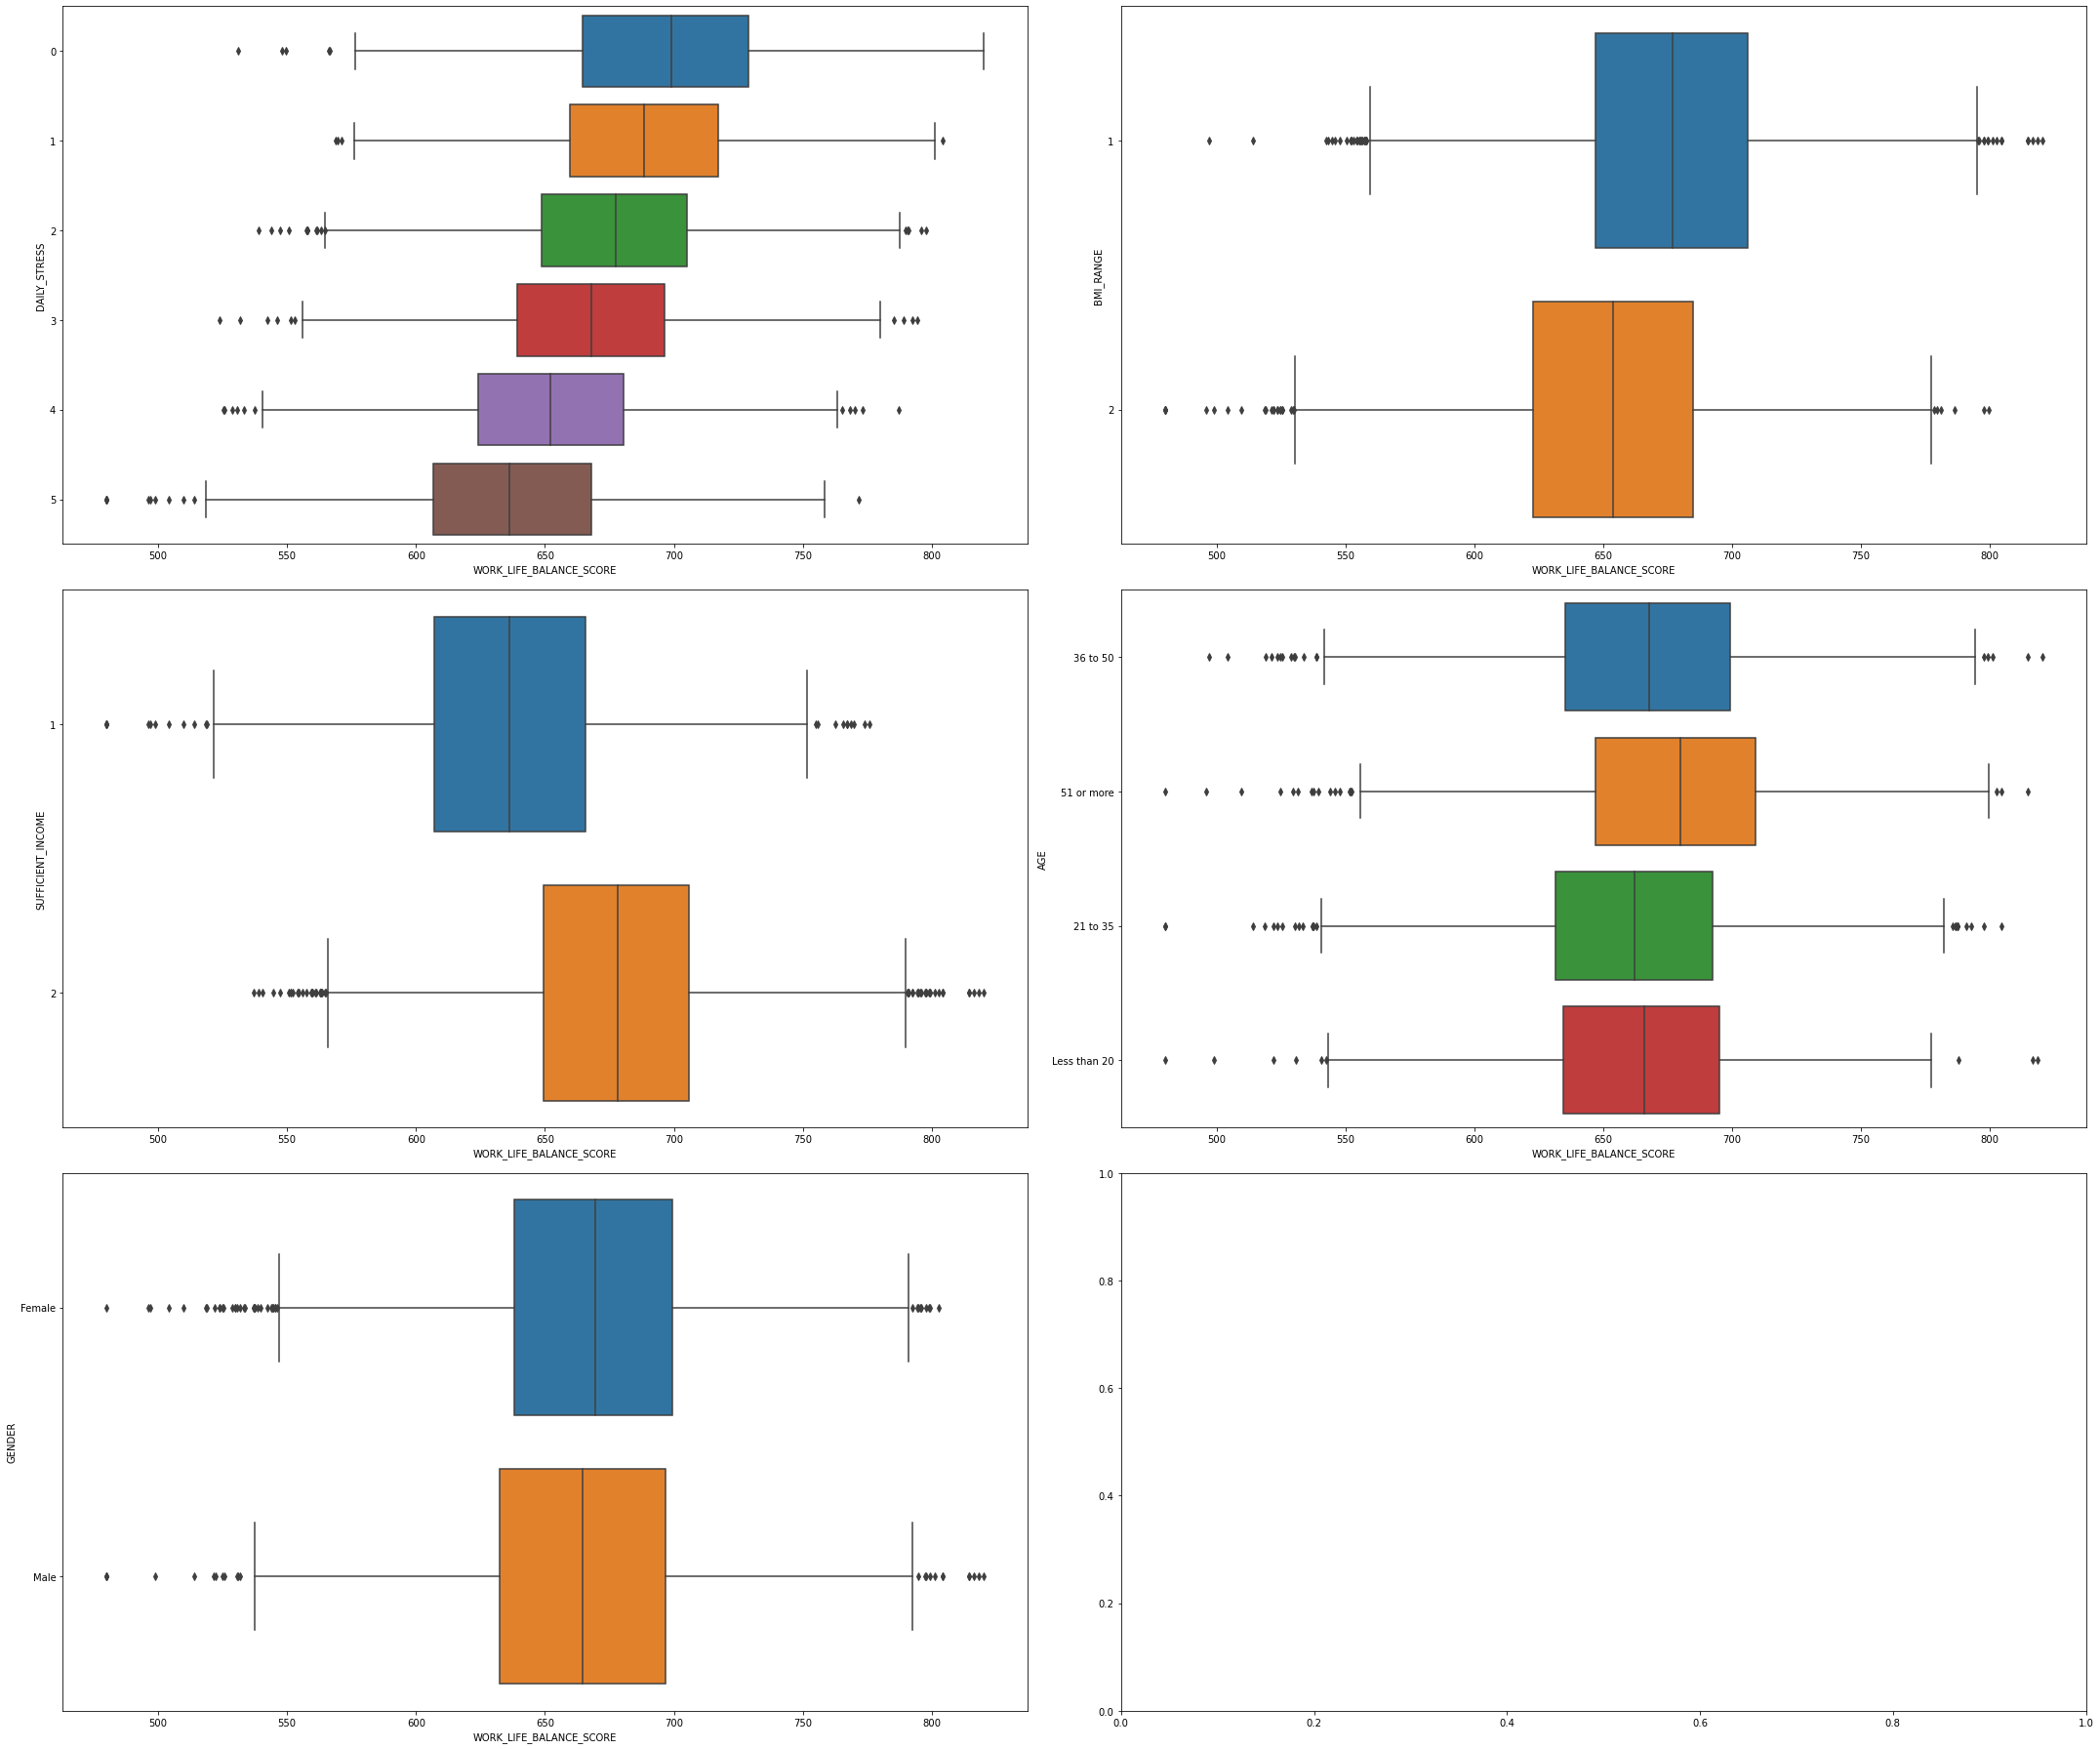

In [65]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (30, 25))

axes = axes.flat

columnas_cat = df4.select_dtypes(include = ["object", "category"]).columns

for i, colum in enumerate(columnas_cat):
    sns.boxplot(
    x       = 'WORK_LIFE_BALANCE_SCORE',
    y       = colum,
    data    = df4,
    palette = 'tab10',
    ax      = axes[i]
    )
    fig.tight_layout();
    

- Analisamos con Levene 

In [66]:
# creamos un diccionario para almacenar los resultados

def datos_test_levene(columna, df4):
    valores = df4[columna].unique()
    d = {}
    for x in valores:
        d["{0}".format(x)] = df4[df4[columna] == x]['WORK_LIFE_BALANCE_SCORE']
    return d

In [68]:
stress = datos_test_levene('DAILY_STRESS', df4)
bmi = datos_test_levene('BMI_RANGE', df4)
income = datos_test_levene('SUFFICIENT_INCOME', df4)
age  = datos_test_levene('AGE' , df4)
gender  = datos_test_levene('GENDER' , df4)

In [69]:
levene_stress = stats.levene(stress['0'], stress['1'], stress['2'], stress['3'], stress['4'], stress['5'], center='median')
levene_stress

LeveneResult(statistic=10.140092395575863, pvalue=1.033896050139175e-09)

In [70]:
# 1: bmi < 25 , 2: bmi >25 
levene_bmi = stats.levene(bmi['1'], bmi['2'], center='median')
levene_bmi

LeveneResult(statistic=9.540916445990653, pvalue=0.002013017558241719)

In [71]:
# Such as the costs of housing, food, health care, car and education.
# 1: Not or hardly sufficient, 2:Sufficient
levene_income = stats.levene(income['1'],income['2'], center='median')
levene_income

LeveneResult(statistic=3.7555936654309203, pvalue=0.052649496954270965)

In [72]:
# intervalos edad : [<= 20], [20-35], [36-50], [>=51]
levene_age = stats.levene(age['Less than 20'], age['21 to 35'], age['36 to 50'], age['51 or more'],  center='median')
levene_age

LeveneResult(statistic=2.684866622070593, pvalue=0.04493418305874755)

In [73]:
levene_gender = stats.levene(gender['Female'], gender['Male'], center='median')
levene_gender

LeveneResult(statistic=15.557010113184829, pvalue=8.041162261021982e-05)

=> 
- stress < 0.05 : distintas : rechazo H0
- bmi < 0.05 : distintas : rechazo H0
- income  > 0.05 : iguales : acept. H0
- age (0.045) < 0.05 : distintas : rechazo H0
- gender < 0.05 : distintas : rechazo H0


# Numericas
- --> No cumple la homogeneidad de varianzas: "En el regplot lo que vemos es la recta que se ajusta a los puntos. Si la dispersión de los puntos es constante en todo el intervalo podremos decir que si se cumple la asunción de homogeneidad de varianzas. "
- Lo veremos analiticamente:
    - test de Levene: Si no se tiene la seguridad de que las poblaciones de origen son normales, utilizando la mediana.
    - H0 (hipótesis nula): las varianzas son iguales => hay homogeneidad de las varianzas u homocedasticidad (pvalor>0.05);
    - H1 (hipótesis alternativa): las varianzas son distintas => no hay homogeneidad( pvalor<0.05)

In [80]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15286 entries, 0 to 15285
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   FRUITS_VEGGIES           15286 non-null  int64   
 1   DAILY_STRESS             15286 non-null  category
 2   CORE_CIRCLE              15286 non-null  int64   
 3   SOCIAL_NETWORK           15286 non-null  int64   
 4   BMI_RANGE                15286 non-null  category
 5   DAILY_STEPS              15286 non-null  int64   
 6   SLEEP_HOURS              15286 non-null  int64   
 7   SUFFICIENT_INCOME        15286 non-null  category
 8   TIME_FOR_PASSION         15286 non-null  int64   
 9   WEEKLY_MEDITATION        15286 non-null  int64   
 10  AGE                      15286 non-null  object  
 11  GENDER                   15286 non-null  object  
 12  WORK_LIFE_BALANCE_SCORE  15286 non-null  float64 
dtypes: category(3), float64(1), int64(7), object(2)
memory usage:

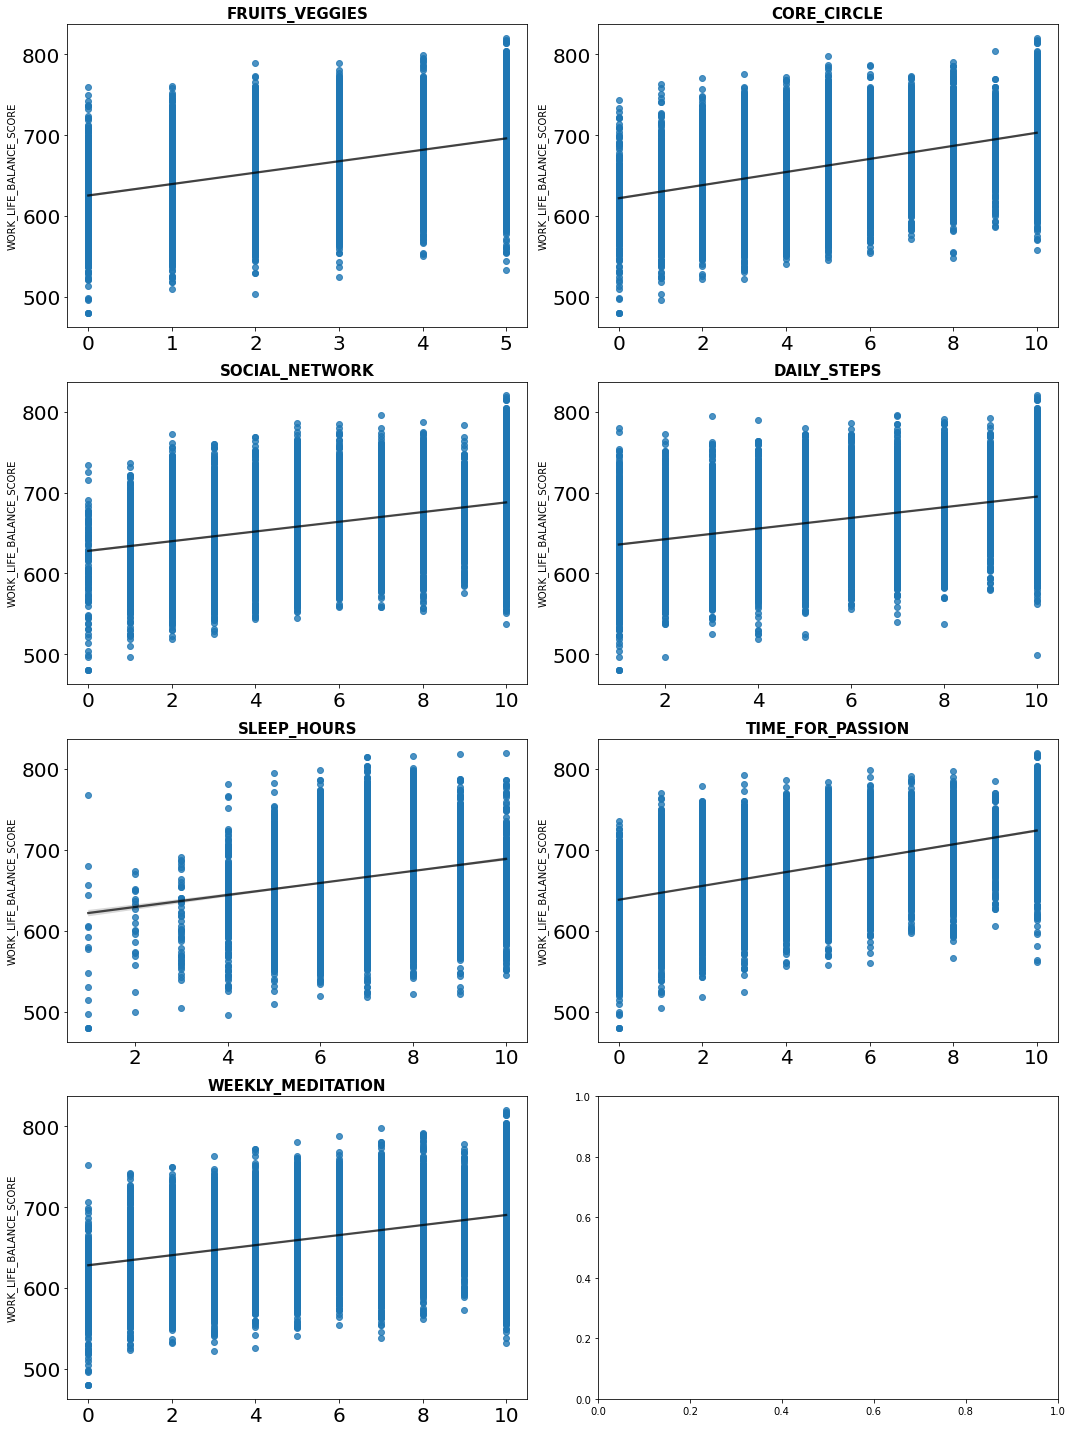

In [90]:
# haremos la relación de las var's predictoras con la var. respuesta :

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15, 20))

# definimos una lista de colores. Cada color corresponderá a una gráfica
lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

# hemos creado una gráfica con varios subplots. Si queremos automatizar el proceso de relleno de cada uno de los plots
## podemos usar el método .flat. Lo que hace es aplanar los ejes para que queden en una única dimensión
## y luego los vamos rellenando. 
axes = axes.flat

# seleccionamos las columnas que queremos graficar
columns_numeric = df4.select_dtypes(include = np.number).drop('WORK_LIFE_BALANCE_SCORE', axis=1)
columns_numeric = columns_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, column in enumerate(columns_numeric): 
    sns.regplot(
        data = df4,
        x = column,
        y = 'WORK_LIFE_BALANCE_SCORE',
        #color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(column, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();

In [86]:
# excluimos la variable respuesta de la seleccion
num_col = df4.select_dtypes(np.number).drop('WORK_LIFE_BALANCE_SCORE', axis = 1).columns

resultados = {}     # creamos un diccionario para los resultados de los test
for col in num_col:     #iteremos por la lista de las columnas numéricas
    statistic, p_valor = levene(df4[col], df.WORK_LIFE_BALANCE_SCORE, center='median')        # calculamos el p-valor de test
    resultados[col] = p_valor     # lo almacenamos en el diccionario

In [87]:
resultados  

{'FRUITS_VEGGIES': 0.0,
 'CORE_CIRCLE': 0.0,
 'SOCIAL_NETWORK': 0.0,
 'DAILY_STEPS': 0.0,
 'SLEEP_HOURS': 0.0,
 'TIME_FOR_PASSION': 0.0,
 'WEEKLY_MEDITATION': 0.0}

=> pvalor < 0.05 : no hay homocedasticidad

--> No cumplen la asunción : todos los resultados para pvalor son < 0.05 => varianzas distintas => heterocedasticidad 

______________________________________________________________

 # Independencia de las variables: test Chi-cuadrado
 
- 'probando la diferencia entre el recuento esperado, y el recuento observado.':
- Las asunciones de chi-cuadrado son:
    - Las dos muestras son independientes
    - Ningún recuento de valores esperado es igual a 0.

    - H0: las variables son independientes : p-valor > 0.05 : aceptamos H0 : variables son independientes.
    - H1: las variables son dependientes : p-valor < 0.05 : rechazamos H0 : variables son dependientes.

            - Tenemos variables numericas dependientes : con corr's entre baja y alta

     
     

Graficamente

In [32]:
# plt.figure()
# sns.heatmap(df4.corr(), annot=True, cmap = 'plasma');

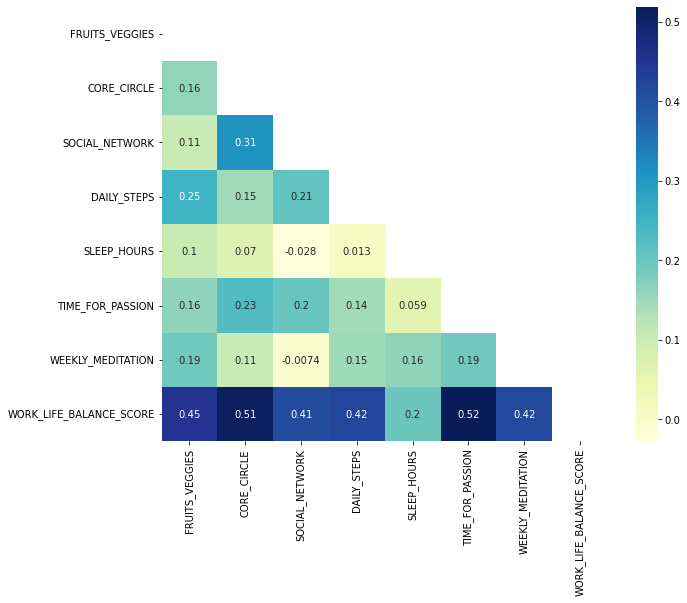

In [33]:
mask = np.triu(np.ones_like(df4.corr(), dtype=np.bool))

sns.heatmap(df4.corr(), # calculamos la correlación. En este caso, como no estamos especificando nada la correlación será la de Pearson.
            cmap = "YlGnBu", # color del mapa
           annot = True, 
           mask = mask); # para sacar el valor de la correlación

- Pearson(-1 y 1) : podemos ver la relacion entre las variables cuantitativas, la intensidad y dirección de la relación entrre ellas:
    - = 0 : no hay relación lineal
    - positiva : aumento de la var.a => aumento var.b
    - negativa : aumento de la var.a => disminuye var.b

=> por el heatmap, vemos que entre las var's cotínuas, la var. sleep_hours es la menos influencia en la var. respuesta. Es decir, mantener un circulo vivo de amigos y familiares así como tener sus momentos de dedicarse al que uno realmente siente pasion, están relacionados con el nível de bien estar de una persona.
- => corr alta : > 0.5 : time for passion, core circle
- => corr moderada: 0.3 -> 0.5 : fruits, social network, daily steps, weekly meditation
- => corr baja : 0.1 -> 0.3 : sleep hours

Analitica : chi-cuadrado 
    

In [34]:
predictoras = df4.columns.drop('WORK_LIFE_BALANCE_SCORE')
predictoras

Index(['FRUITS_VEGGIES', 'DAILY_STRESS', 'CORE_CIRCLE', 'SOCIAL_NETWORK',
       'BMI_RANGE', 'DAILY_STEPS', 'SLEEP_HOURS', 'SUFFICIENT_INCOME',
       'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE', 'GENDER'],
      dtype='object')

In [35]:
from itertools import combinations
 
 
# size of combination is set to 3
combinaciones = list(combinations(predictoras, 2))
print(combinaciones) 


[('FRUITS_VEGGIES', 'DAILY_STRESS'), ('FRUITS_VEGGIES', 'CORE_CIRCLE'), ('FRUITS_VEGGIES', 'SOCIAL_NETWORK'), ('FRUITS_VEGGIES', 'BMI_RANGE'), ('FRUITS_VEGGIES', 'DAILY_STEPS'), ('FRUITS_VEGGIES', 'SLEEP_HOURS'), ('FRUITS_VEGGIES', 'SUFFICIENT_INCOME'), ('FRUITS_VEGGIES', 'TIME_FOR_PASSION'), ('FRUITS_VEGGIES', 'WEEKLY_MEDITATION'), ('FRUITS_VEGGIES', 'AGE'), ('FRUITS_VEGGIES', 'GENDER'), ('DAILY_STRESS', 'CORE_CIRCLE'), ('DAILY_STRESS', 'SOCIAL_NETWORK'), ('DAILY_STRESS', 'BMI_RANGE'), ('DAILY_STRESS', 'DAILY_STEPS'), ('DAILY_STRESS', 'SLEEP_HOURS'), ('DAILY_STRESS', 'SUFFICIENT_INCOME'), ('DAILY_STRESS', 'TIME_FOR_PASSION'), ('DAILY_STRESS', 'WEEKLY_MEDITATION'), ('DAILY_STRESS', 'AGE'), ('DAILY_STRESS', 'GENDER'), ('CORE_CIRCLE', 'SOCIAL_NETWORK'), ('CORE_CIRCLE', 'BMI_RANGE'), ('CORE_CIRCLE', 'DAILY_STEPS'), ('CORE_CIRCLE', 'SLEEP_HOURS'), ('CORE_CIRCLE', 'SUFFICIENT_INCOME'), ('CORE_CIRCLE', 'TIME_FOR_PASSION'), ('CORE_CIRCLE', 'WEEKLY_MEDITATION'), ('CORE_CIRCLE', 'AGE'), ('CORE_

In [36]:
for i in combinaciones:
    crosstab, test_results, expected = rp.crosstab(df4[i[0]], df4[i[1]],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    print(f"INDEPENDENCIA ENTRE {i[0], i[1]} \n", test_results)
    print("........................")

INDEPENDENCIA ENTRE ('FRUITS_VEGGIES', 'DAILY_STRESS') 
                  Chi-square test   results
0  Pearson Chi-square ( 25.0) =   271.0996
1                     p-value =     0.0000
2                  Cramer's V =     0.0596
........................
INDEPENDENCIA ENTRE ('FRUITS_VEGGIES', 'CORE_CIRCLE') 
                  Chi-square test   results
0  Pearson Chi-square ( 50.0) =   556.7908
1                     p-value =     0.0000
2                  Cramer's V =     0.0854
........................
INDEPENDENCIA ENTRE ('FRUITS_VEGGIES', 'SOCIAL_NETWORK') 
                  Chi-square test   results
0  Pearson Chi-square ( 50.0) =   364.1852
1                     p-value =     0.0000
2                  Cramer's V =     0.0690
........................
INDEPENDENCIA ENTRE ('FRUITS_VEGGIES', 'BMI_RANGE') 
                 Chi-square test   results
0  Pearson Chi-square ( 5.0) =   156.0194
1                    p-value =     0.0000
2                 Cramer's V =     0.1010
...............

In [48]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,98.6458
1,p-value =,0.0000
2,Cramer's V =,0.0803


=> Las var's numéricas son dependientes , todas con pvalor < 0.05 : rechazamos H0.

In [50]:
# para probar, hacemos con otras dos variables 8categoricas) que a priori no son dependientes: masa corporal y salario.
crosstab1, test_results1, expected1 = rp.crosstab(df4['BMI_RANGE'], df4['SUFFICIENT_INCOME'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")


In [52]:
test_results1

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,0.4837
1,p-value =,0.4868
2,Cramer's phi =,0.0056


- --> p-value < 0.05 : variables dependientes 
    - Pearson 0.3-0.5 : relación de dependencia moderada
    - Cramer's V : 0-0.1 : variables independientes
